In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import math
import matplotlib.pyplot as plt

In [2]:
transData = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
transData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [5]:
transData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null int64
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [6]:
# Changing the DATE to date format

In [7]:
transData['DATE'] = pd.to_datetime(transData['DATE'], origin="1899-12-30", unit='D')

In [8]:
transData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
transData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264836 non-null datetime64[ns]
STORE_NBR         264836 non-null int64
LYLTY_CARD_NBR    264836 non-null int64
TXN_ID            264836 non-null int64
PROD_NBR          264836 non-null int64
PROD_NAME         264836 non-null object
PROD_QTY          264836 non-null int64
TOT_SALES         264836 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [10]:
transData.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [16]:
product_sales = transData.groupby('PROD_NAME')['TOT_SALES'].sum()
print(product_sales)

PROD_NAME
Burger Rings 220g                            6831.0
CCs Nacho Cheese    175g                     5961.9
CCs Original 175g                            6048.0
CCs Tasty Cheese    175g                     6069.0
Cheetos Chs & Bacon Balls 190g               9243.3
Cheetos Puffs 165g                           7641.2
Cheezels Cheese 330g                        34296.9
Cheezels Cheese Box 125g                     5733.0
Cobs Popd Sea Salt  Chips 110g              23852.6
Cobs Popd Sour Crm  &Chives Chips 110g      22944.4
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    23772.8
Dorito Corn Chp     Supreme 380g            40352.0
Doritos Cheese      Supreme 330g            33390.6
Doritos Corn Chip Mexican Jalapeno 150g     23887.5
Doritos Corn Chip Southern Chicken 150g     23735.4
Doritos Corn Chips  Cheese Supreme 170g     27183.2
Doritos Corn Chips  Nacho Cheese 170g       26562.8
Doritos Corn Chips  Original 170g           26228.4
Doritos Mexicana    170g                    26290.0
Do

In [17]:
Pro_qty_sold = transData.groupby('PROD_NAME')['PROD_QTY'].sum()
Pro_qty_sold

PROD_NAME
Burger Rings 220g                           2970
CCs Nacho Cheese    175g                    2839
CCs Original 175g                           2880
CCs Tasty Cheese    175g                    2890
Cheetos Chs & Bacon Balls 190g              2801
Cheetos Puffs 165g                          2729
Cheezels Cheese 330g                        6017
Cheezels Cheese Box 125g                    2730
Cobs Popd Sea Salt  Chips 110g              6277
Cobs Popd Sour Crm  &Chives Chips 110g      6038
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    6256
Dorito Corn Chp     Supreme 380g            6509
Doritos Cheese      Supreme 330g            5858
Doritos Corn Chip Mexican Jalapeno 150g     6125
Doritos Corn Chip Southern Chicken 150g     6086
Doritos Corn Chips  Cheese Supreme 170g     6180
Doritos Corn Chips  Nacho Cheese 170g       6037
Doritos Corn Chips  Original 170g           5961
Doritos Mexicana    170g                    5975
Doritos Salsa       Medium 300g             2735
Doritos Sa

In [18]:
transData['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

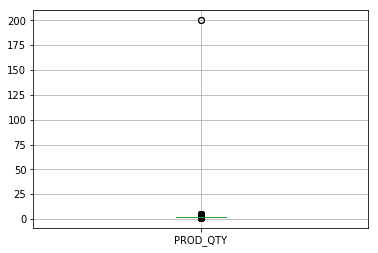

In [19]:
bplot3 = transData.boxplot(column = ['PROD_QTY'])
plt.show()

In [ ]:
# There is an outlier for product quantity. Lets analyse it

In [22]:
transData['PROD_QTY'].describe()

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [26]:
transData['PROD_QTY'].value_counts(bins = 5).sort_index()

(0.8, 40.8]       264834
(40.8, 80.6]           0
(80.6, 120.4]          0
(120.4, 160.2]         0
(160.2, 200.0]         2
Name: PROD_QTY, dtype: int64

In [ ]:
# We have 2 entries that seem to be outliers in the data

In [27]:
transData.sort_values(by = "PROD_QTY", ascending = False).head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0
217237,2019-05-18,201,201060,200202,26,Pringles Sweet&Spcy BBQ 134g,5,18.5
238333,2018-08-14,219,219004,218018,25,Pringles SourCream Onion 134g,5,18.5
238471,2019-05-19,261,261331,261111,87,Infuzions BBQ Rib Prawn Crackers 110g,5,19.0


In [ ]:
# We can see that the transactions with product quantity 200 happened on same loyalty card number.

In [28]:
filtered_transData = transData.sort_values(by = "PROD_QTY", ascending = False).head()

In [31]:
filtered_transData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [32]:
filtered_transData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264834 entries, 0 to 264835
Data columns (total 8 columns):
DATE              264834 non-null datetime64[ns]
STORE_NBR         264834 non-null int64
LYLTY_CARD_NBR    264834 non-null int64
TXN_ID            264834 non-null int64
PROD_NBR          264834 non-null int64
PROD_NAME         264834 non-null object
PROD_QTY          264834 non-null int64
TOT_SALES         264834 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 18.2+ MB


In [33]:
filtered_transData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [34]:
# Now we can see that the max value of Product quantity is reduced to 5, whereas previously it was 200. 
# Thus, the outliers are removed.

In [20]:
# Dataframe for strings/products with chips in name

In [35]:
product_chips = filtered_transData[filtered_transData['PROD_NAME'].str.contains('Chip|Chips', case = False)]
print(product_chips)

             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0      2018-10-17          1            1000       1         5   
2      2019-05-20          1            1343     383        61   
3      2018-08-17          2            2373     974        69   
6      2019-05-16          4            4149    3333        16   
8      2018-08-20          5            5026    4525        42   
10     2019-05-17          7            7215    7176        16   
14     2019-05-15         19           19272   16686        44   
18     2018-08-17         22           22456   18696        93   
26     2018-08-19         39           39167   35638       111   
33     2019-05-18         45           45220   41651        22   
38     2018-08-18         54           54305   48301        44   
40     2019-05-14         55           55072   48883       106   
52     2019-05-20         71           71122   69717        40   
57     2019-05-14         75           75091   73751        42   
68     201

In [ ]:
# Summary of dataframe with 'chips' entries only

In [36]:
product_chips.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,74570.000000,7.457000e+04,74570.000000,74570.000000,74570.000000,74570.000000
mean,135.457651,1.359095e+05,135533.580448,50.651039,1.904264,6.860511
std,76.753058,8.025342e+04,77960.794363,32.792579,0.343675,2.256661
min,1.000000,1.000000e+03,1.000000,1.000000,1.000000,1.900000
25%,70.000000,7.013000e+04,68237.250000,27.000000,2.000000,5.800000
50%,131.000000,1.311975e+05,135503.500000,42.000000,2.000000,6.600000
75%,203.000000,2.032402e+05,203284.250000,78.000000,2.000000,7.800000
max,272.000000,2.373711e+06,270209.000000,111.000000,5.000000,29.500000


In [ ]:
# Identifying if there are any null values

In [37]:
product_chips.isnull()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False
14,False,False,False,False,False,False,False,False
18,False,False,False,False,False,False,False,False
26,False,False,False,False,False,False,False,False
33,False,False,False,False,False,False,False,False


In [ ]:
# EDA 

In [38]:
product_chip_sales = product_chips.groupby('PROD_NAME')['TOT_SALES'].sum()
print(product_chip_sales)

PROD_NAME
Cobs Popd Sea Salt  Chips 110g              23852.6
Cobs Popd Sour Crm  &Chives Chips 110g      22944.4
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    23772.8
Doritos Corn Chip Mexican Jalapeno 150g     23887.5
Doritos Corn Chip Southern Chicken 150g     23735.4
Doritos Corn Chips  Cheese Supreme 170g     27183.2
Doritos Corn Chips  Nacho Cheese 170g       26562.8
Doritos Corn Chips  Original 170g           26228.4
French Fries Potato Chips 175g               7929.0
Natural Chip        Compny SeaSalt175g       8331.0
Natural Chip Co     Tmato Hrb&Spce 175g      8934.0
Natural ChipCo      Hony Soy Chckn175g       8274.0
Natural ChipCo Sea  Salt & Vinegr 175g       8733.0
Smiths Chip Thinly  Cut Original 175g        9135.0
Smiths Chip Thinly  CutSalt/Vinegr175g       8196.0
Smiths Chip Thinly  S/Cream&Onion 175g       8313.0
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Smiths Crinkle Cut  Chips Barbecue 170g      8125.8
Smiths Crinkle Cut  Chips Chicken 170g       8183.8
Sm

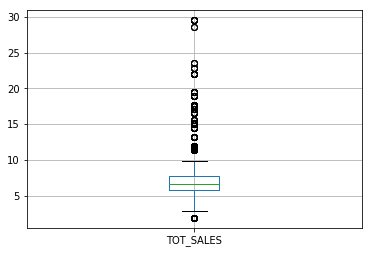

In [39]:
bplot1 = product_chips.boxplot(column = ['TOT_SALES'])
plt.show()

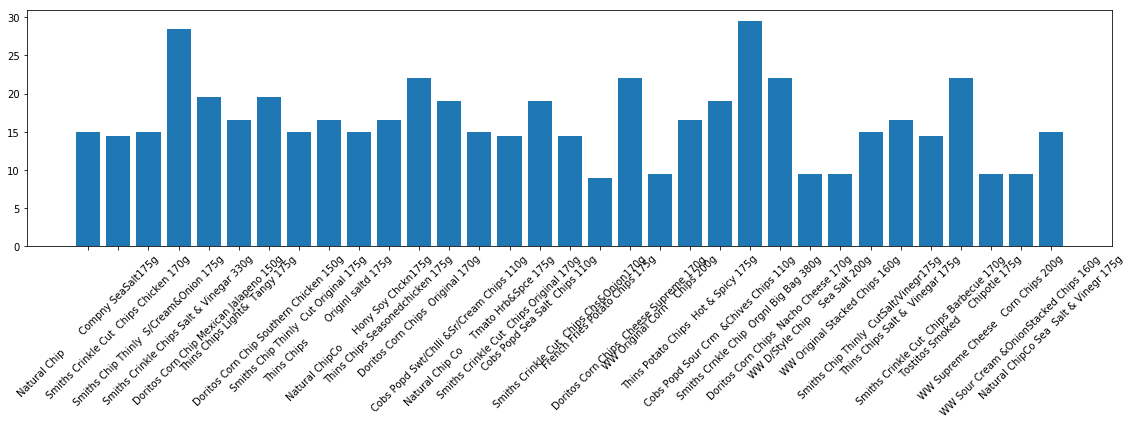

In [41]:
plt.figure(figsize=(16, 6))
plt.bar(product_chips['PROD_NAME'], product_chips['TOT_SALES'])
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [11]:
print(filtered_transData.DATE.min(), transData.DATE.max())

2018-07-01 00:00:00 2019-06-30 00:00:00


In [47]:
dates = filtered_transData[['DATE']]
dates.drop_duplicates('DATE', inplace = True)
dates['month'] = filtered_transData['DATE'].dt.month_name()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
dates.head()

,DATE,month
0,2018-10-17,October
1,2019-05-14,May
2,2019-05-20,May
3,2018-08-17,August
4,2018-08-18,August


In [49]:
month_sales_count = dates.groupby('month').count()

In [50]:
month_sales_count

,DATE
month,
April,30
August,31
December,30
February,28
January,31
July,31
June,30
March,31
May,31


# All the months have count as per the no.of days except 'December'. December seems to have data for 30 days instead of 31.

In [71]:
december_data = dates[dates.month == 'December']

In [72]:
december_data.sort_values(['DATE'])

,DATE,month
461,2018-12-01,December
284,2018-12-02,December
447,2018-12-03,December
396,2018-12-04,December
314,2018-12-05,December
869,2018-12-06,December
564,2018-12-07,December
1693,2018-12-08,December
341,2018-12-09,December
448,2018-12-10,December


# Seems like 25th December has no Entries.